## Analysing the Correlation b/w Price and Other factors of Houses in Melbourne

The dataset consists of suburb,address,price,method of selling,year of built,how many rooms, distance from CBD(Central Business District),real estate agent,landsize, building area etc.The main objective of this analysis is to identify the influence of Age,Landsize,regionname etc that affect on prices of houses in Melbourne.
Here am going to check the all missing values in dataset, and deletimg those,check the correlation b/w price and other details by using Heatmap & what it can infer, check the price distribution,check the statistical data etc.

The variables used in our analysis as follows
- **Suburb**: Suburb
- **Rooms**: Number of rooms
- **Price**: Price in dollars
- **Method**: Status of property sale
    - S - property sold; 
    - SP - property sold prior; 
    - PI - property passed in; 
    - PN - sold prior not disclosed; 
    - SN - sold not disclosed; 
    - VB - vendor bid; 
    - W -  withdrawn prior to auction; 
    - SA - sold after auction; 
    - SS - sold after auction price not disclosed.
- **Type**: Type of house 
    - h - house,cottage,villa, semi,terrace; 
    - u - unit, duplex; 
    - t - townhouse;
- **SellerG**: Real Estate Agent
- **Date**: Date sold
- **Distance**: Distance from CBD
- **Regionname**: General Region (West, North West, North, North east …etc)
- **Propertycount**: Number of properties that exist in the suburb.
- **Bedroom2**: Number of Bedrooms
- **Bathroom**: Number of Bathrooms
- **Car**: Number of carspots
- **Landsize**: Land Size
- **YearBuilt**: Year the house was built

First we need to install all the required libraries from python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To read the uploaded file we need to use the **pd.read_csv** method from pandas.

In [5]:
melb_data=pd.read_csv('melb_dataframe.csv') # melb_dataframe is downloaded dataset and uploaded to jupyter notebook

All the data stored in melb_data read from melb_dataframe,now we can see how the data looks like!

In [6]:
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,Bulleen,28 Kenneth St,4,h,976000,S,Barry,18/06/2016,11.8,3105,...,1,1,701,NaN,NaN,Manningham,-37.7786,145.0945,Eastern Metropolitan,4480
1494,Bulleen,15 Riverview Tce,2,h,980000,S,Fletchers,18/06/2016,11.8,3105,...,1,1,551,NaN,NaN,Manningham,-37.7739,145.0962,Eastern Metropolitan,4480
1495,Bulleen,1/7 Westwood Dr,3,u,812500,S,Barry,19/11/2016,11.8,3105,...,1,1,421,NaN,NaN,Manningham,-37.7798,145.1023,Eastern Metropolitan,4480
1496,Bulleen,14 Collins St,3,h,990000,PI,Barry,22/08/2016,11.8,3105,...,1,2,602,175.0,1975.0,Manningham,-37.7674,145.0988,Eastern Metropolitan,4480


If we want to know the how many rows and columns does contain the dataframe, we can use **.shape** method in pandas.

In [8]:
melb_data.shape

(1498, 21)

From the above the dataset(melb_data) cosists of 1498 rows and 21 columns.

In [11]:
melb_data.columns # To know the list of columns present in dataframe

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Identify all the missing columns where there are  any null values?? Use .isnull().any() function to identify any null values present in dataframe.

In [12]:
melb_data.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

From the output we can see that isnull() function returns an object containing boolean values,all missing values mapped to True. To know the sum of missing values use .isnull().sum()

In [13]:
melb_data.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea     652
YearBuilt        537
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [14]:
melb_data.isnull().sum().sum() # Total missing values present in data frame

1189

To delete all the Rows that has missing values in any of the columns, use **.dropna()** function from pandas.

In [15]:
melb_data.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/5/2016,2.5,3067,...,2,0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,...,1,2,256,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,Bulleen,23 Bourke St,4,h,1302000,SP,Barry,15/10/2016,11.8,3105,...,2,2,475,245.0,1996.0,Manningham,-37.7650,145.0933,Eastern Metropolitan,4480
1489,Bulleen,8 Vera St,3,h,1050000,PI,Fletchers,15/10/2016,11.8,3105,...,2,1,728,719.0,1965.0,Manningham,-37.7765,145.1031,Eastern Metropolitan,4480
1490,Bulleen,71 Summit Dr,4,h,1000000,VB,hockingstuart,16/04/2016,11.8,3105,...,2,3,672,212.0,1970.0,Manningham,-37.7689,145.0895,Eastern Metropolitan,4480
1491,Bulleen,7 Kampman St,4,h,1300000,S,McGrath,18/03/2017,11.8,3105,...,2,2,744,300.0,1985.0,Manningham,-37.7791,145.0860,Eastern Metropolitan,4480


From the above we came to know that no of rows reduced from 1498 to 818 i.e deleted all the rows that containing missing values in any of the column.

Here i would like introduce **categorial/object** variables and **Numerical** variables present in dataframe

- **categorial/object** variables: Categorical variables can take on only a limited, and usually fixed number of possible values. Besides the fixed length, categorical data might have an order but cannot perform numerical operation. 
- **Numerical** variables: Numeric variables in Python are used to store numbers. Numbers are usually stored as integers, floating-point values, or complex numbers, depending on the requirements of the program.

### Q) What are  all categorical/object variables present in Melbourne dataframe??

In [16]:
melb_data.select_dtypes(exclude=['int','float']).columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

### Q) What are all numerical variables present in Melbourne dataframe??

In [17]:
melb_data.select_dtypes(include=['int','float']).columns

Index(['Distance', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], dtype='object')

### Q) Create a new column 'Total Rooms' by taking the mean of columns 'Rooms' and 'Bedroom2'. After that delete both the Rooms and Bedroom2 columns.


In [18]:
melb_data['Total_Rooms']= melb_data[['Rooms','Bedroom2']].mean(axis=1)

In [19]:
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Total_Rooms
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,3.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,1,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,3.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,2,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,Bulleen,28 Kenneth St,4,h,976000,S,Barry,18/06/2016,11.8,3105,...,1,701,NaN,NaN,Manningham,-37.7786,145.0945,Eastern Metropolitan,4480,4.0
1494,Bulleen,15 Riverview Tce,2,h,980000,S,Fletchers,18/06/2016,11.8,3105,...,1,551,NaN,NaN,Manningham,-37.7739,145.0962,Eastern Metropolitan,4480,2.5
1495,Bulleen,1/7 Westwood Dr,3,u,812500,S,Barry,19/11/2016,11.8,3105,...,1,421,NaN,NaN,Manningham,-37.7798,145.1023,Eastern Metropolitan,4480,3.0
1496,Bulleen,14 Collins St,3,h,990000,PI,Barry,22/08/2016,11.8,3105,...,2,602,175.0,1975.0,Manningham,-37.7674,145.0988,Eastern Metropolitan,4480,3.0


 Now deleting the 'Rooms' and 'Bedroom2' by using .drop() method in pandas.

In [20]:
melb_data = melb_data.drop(['Rooms','Bedroom2'],axis=1)

In [21]:
melb_data

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Total_Rooms
0,Abbotsford,85 Turner St,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2.0
1,Abbotsford,25 Bloomburg St,h,1035000,S,Biggin,4/2/2016,2.5,3067,1,0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2.0
2,Abbotsford,5 Charles St,h,1465000,SP,Biggin,4/3/2017,2.5,3067,2,0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,3.0
3,Abbotsford,40 Federation La,h,850000,PI,Biggin,4/3/2017,2.5,3067,2,1,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,3.0
4,Abbotsford,55a Park St,h,1600000,VB,Nelson,4/6/2016,2.5,3067,1,2,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,Bulleen,28 Kenneth St,h,976000,S,Barry,18/06/2016,11.8,3105,1,1,701,NaN,NaN,Manningham,-37.7786,145.0945,Eastern Metropolitan,4480,4.0
1494,Bulleen,15 Riverview Tce,h,980000,S,Fletchers,18/06/2016,11.8,3105,1,1,551,NaN,NaN,Manningham,-37.7739,145.0962,Eastern Metropolitan,4480,2.5
1495,Bulleen,1/7 Westwood Dr,u,812500,S,Barry,19/11/2016,11.8,3105,1,1,421,NaN,NaN,Manningham,-37.7798,145.1023,Eastern Metropolitan,4480,3.0
1496,Bulleen,14 Collins St,h,990000,PI,Barry,22/08/2016,11.8,3105,1,2,602,175.0,1975.0,Manningham,-37.7674,145.0988,Eastern Metropolitan,4480,3.0


### Q) Create a new column "Age" based on the column "YearBuilt".

In [23]:
import datetime

In [24]:
melb_data['Year'] = pd.to_datetime(melb_data['YearBuilt'], format = "%Y")

**pd.to_datetime** method is used to convert the dtype:object to dtype:datetime.

In [25]:
melb_data['Year']

0             NaT
1      1900-01-01
2      1900-01-01
3             NaT
4      2014-01-01
          ...    
1493          NaT
1494          NaT
1495          NaT
1496   1975-01-01
1497          NaT
Name: Year, Length: 1498, dtype: datetime64[ns]

Now calculating the Age based on yearbuilt

In [26]:
def from_YearBuilt_to_age(built):
    today = datetime.date.today()
    return today.year-built.year
melb_data['Age']=melb_data['Year'].apply(lambda x:from_YearBuilt_to_age(x))

In [27]:
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Age
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,NaT,NaN
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,1900-01-01,120.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,1900-01-01,120.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,NaT,NaN
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2014-01-01,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,Bulleen,28 Kenneth St,4,h,976000,S,Barry,18/06/2016,11.8,3105,...,701,NaN,NaN,Manningham,-37.7786,145.0945,Eastern Metropolitan,4480,NaT,NaN
1494,Bulleen,15 Riverview Tce,2,h,980000,S,Fletchers,18/06/2016,11.8,3105,...,551,NaN,NaN,Manningham,-37.7739,145.0962,Eastern Metropolitan,4480,NaT,NaN
1495,Bulleen,1/7 Westwood Dr,3,u,812500,S,Barry,19/11/2016,11.8,3105,...,421,NaN,NaN,Manningham,-37.7798,145.1023,Eastern Metropolitan,4480,NaT,NaN
1496,Bulleen,14 Collins St,3,h,990000,PI,Barry,22/08/2016,11.8,3105,...,602,175.0,1975.0,Manningham,-37.7674,145.0988,Eastern Metropolitan,4480,1975-01-01,45.0


For the numeric columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the .describe method.

### Q) Check the describe() method and visually check if there are any outliers in the data?

**.describe()** method is used to check the some statistical information like mean, standard deviation,min/max values and no.of non-empty values for the numeric columns.

In [28]:
melb_data.describe()

,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Total_Rooms,Age
count,1.498000e+03,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,846.000000,961.000000,1498.000000,1498.000000,1498.000000,1498.000000,961.000000
mean,1.249705e+06,9.707610,3115.121495,1.624833,1.675567,492.978638,168.933806,1961.233091,-37.838984,145.001074,7134.550734,3.028371,58.766909
std,6.958958e+05,3.351191,62.406686,0.777590,0.958848,1965.171097,250.059648,35.994065,0.064874,0.080068,2936.318907,0.950176,35.994065
min,2.400000e+05,2.500000,3018.000000,0.000000,0.000000,0.000000,1.000000,1880.000000,-37.937600,144.807500,2211.000000,1.000000,2.000000
25%,7.700000e+05,6.300000,3056.000000,1.000000,1.000000,195.000000,100.000000,1938.000000,-37.912900,144.950875,4605.000000,2.000000,25.000000
50%,1.100000e+06,10.700000,3105.000000,1.000000,2.000000,416.500000,137.500000,1960.000000,-37.829250,145.012350,6795.000000,3.000000,60.000000
75%,1.539250e+06,13.000000,3165.000000,2.000000,2.000000,638.750000,196.000000,1995.000000,-37.776700,145.070875,10579.000000,4.000000,82.000000
max,5.525000e+06,13.900000,3206.000000,7.000000,8.000000,75100.000000,6791.000000,2018.000000,-37.716400,145.137300,11918.000000,8.500000,140.000000


### Q) Check the distribution of Price column using the sns.distplot

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.

A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.i.e. only one observation and hence we choose one particular column of the dataset(would like to see the how price is distributed)

Now import all the required libraries from python.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
melb_data=pd.read_csv('melb_dataframe.csv')

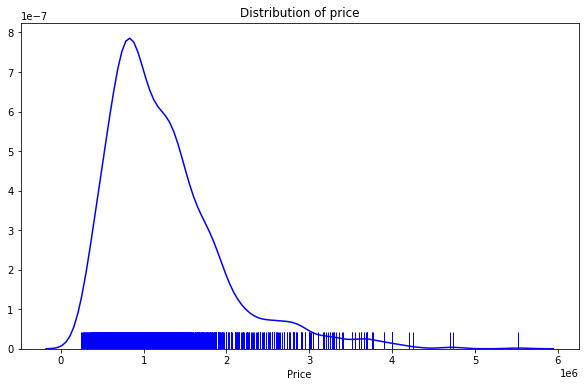

In [4]:
plt.figure(figsize=(10,6));np.random.seed(0)
plt.title('Distribution of price')
sns.distplot(melb_data.Price, rug=True, hist=False,color='blue');

### Q) Check the Price on X-Axis and Type, Method, Regionname columns on Y-Axis by using sns.boxplot?

Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set. It is also useful in comparing the distribution of data across data sets by drawing boxplots for each of them.
To make basic boxplot with Seaborn, we can use the pandas dataframe as input and use Seaborn’s boxplot function. In addition to the data, we can also specify multiple options to customize the boxplot with Seaborn. Let us choose color palette scheme for the boxplot with Seaborn. Here, we have chosen colorblind friendly palette “colorblind”. Other color palette options available in Seaborn include deep, muted, bright, pastel, and dark. Let us also specify the width of the boxes in boxplot.

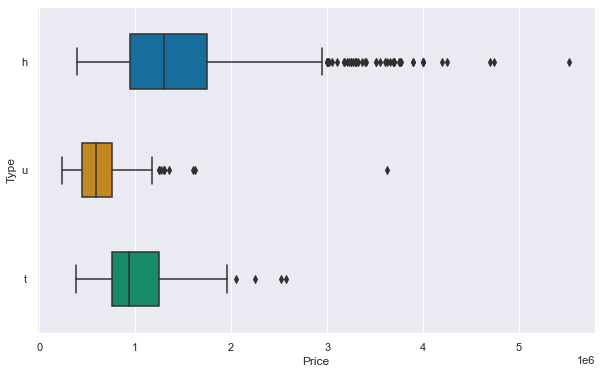

In [7]:
sns.set(rc={"figure.figsize": (10, 6)})
bplot=sns.boxplot(x='Price',y='Type',data=melb_data,width=0.5,palette='colorblind');

we have made much better looking boxplots with Seaborn, we can try to improve other aspects of boxplot. One thing to notice is that the font sizes of x-axis and y-axis labels are small and may not be clearly visible.we can change the fontsizes for x and y-axes labels and also a make a title for the boxplot created by Seaborn.

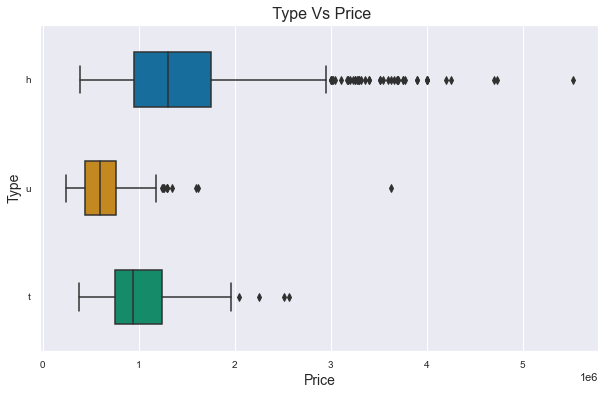

In [8]:
sns.set(rc={"figure.figsize": (10, 6)})
bplot=sns.boxplot(x='Price',y='Type',data=melb_data,width=0.5,palette='colorblind');
bplot.axes.set_title(" Type Vs Price",fontsize=16)
bplot.set_xlabel("Price",fontsize=14)
bplot.set_ylabel("Type",fontsize=14)
bplot.tick_params(labelsize=10)

From the above we can notice that is h(house,cottage,villa, semi,terrace) has highest median house price and u(unit, duplex) has the lowest meadian house price.

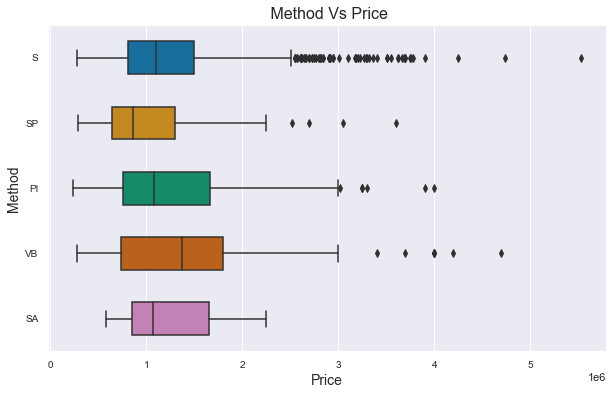

In [9]:
sns.set(rc={"figure.figsize": (10, 6)})
bplot=sns.boxplot(x='Price',y='Method',data=melb_data,width=0.5,palette='colorblind');
bplot.axes.set_title(" Method Vs Price",fontsize=16)
bplot.set_xlabel("Price",fontsize=14)
bplot.set_ylabel("Method",fontsize=14)
bplot.tick_params(labelsize=10)

From the above plot VB(vendor bid) has the highest meadian house price where as SP(property sold prior) has the lowest median house price.

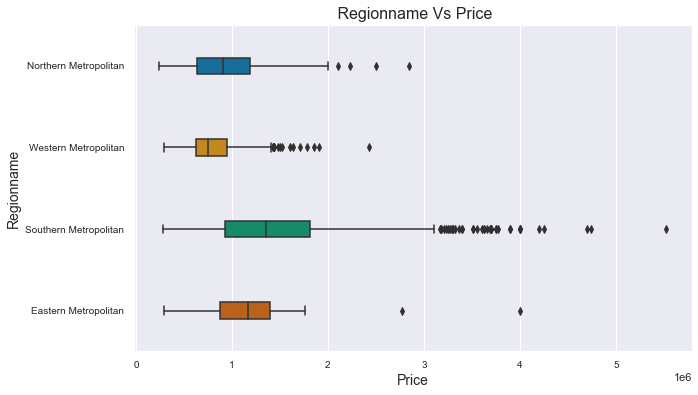

In [10]:
bplot=sns.boxplot(x='Price',y='Regionname',data=melb_data,width=0.2,palette='colorblind');
sns.set(rc={"figure.figsize": (10, 6)})
bplot.axes.set_title(" Regionname Vs Price",fontsize=16)
bplot.set_xlabel("Price",fontsize=14)
bplot.set_ylabel("Regionname",fontsize=14)
bplot.tick_params(labelsize=10)

Western Victoria has lowest median house price whereas Southern Metropolitan has highest median house price.

Adding datapoints to the box plot by using stripplot.
Boxplot alone is extremely useful in getting the summary of data within and between groups. However, often, it is a good practice to overlay the actual data points on the boxplot. Using Seaborn, we can do that in a few ways. One way to make boxplot with data points in Seaborn is to use stripplot available in Seaborn.

We will first use Seaborn’s boxplot like before with no data points and add a layer of data points to the boxplot with stripplot. While plotting with stripplot, we can use its multiple options to make it look better. For example we can specify what marker we can use to show the data points and it is also better to use jitter=True option to spread the data points horizontally.

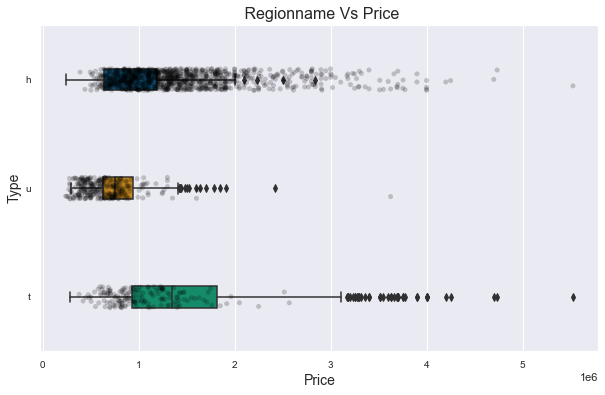

In [11]:
bplot=sns.boxplot(x='Price',y='Regionname',data=melb_data,width=0.2,palette='colorblind');
sns.set(rc={"figure.figsize": (10, 6)})
bplot.axes.set_title(" Regionname Vs Price",fontsize=16)
bplot.set_xlabel("Price",fontsize=14)
bplot.set_ylabel("Regionname",fontsize=14)
bplot.tick_params(labelsize=10)
bplot = sns.stripplot(x='Price',y='Type',data=melb_data,jitter=True,marker='o',alpha=0.2,color='black');

### Q) Use the sns.scatter plot with Price column in X-Axis and Rooms, Distance, Bathrooms, Car, Landsize, BuildingArea, Age, Propertycount on Y-Axis (8 different charts).

Scatter plots are used to determine relationships between two numerical variables. They can help see if there is a direct relationship (positive linear relationship or negative linear relationship for example) between two variables. Also, they can help us detect if our data has outliers or not.

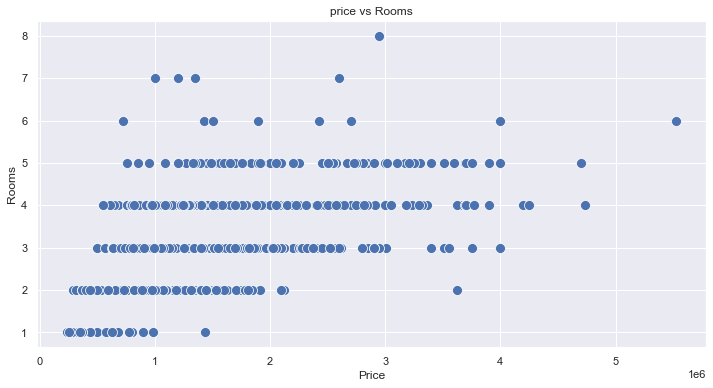

In [12]:
plt.figure(figsize=(12,6))
plt.title('price vs Rooms')

sns.scatterplot(melb_data.Price,
                melb_data.Rooms,
                s=100);

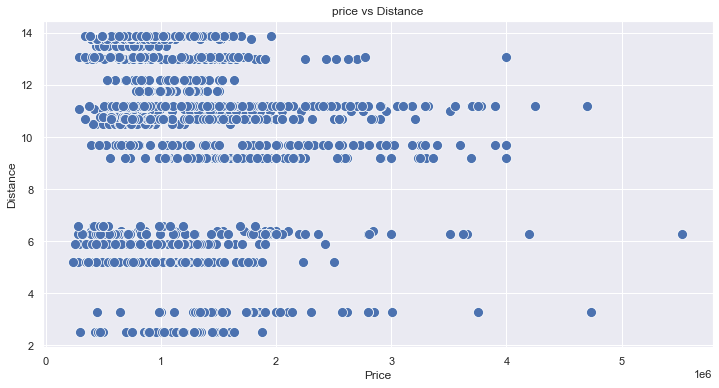

In [13]:
plt.figure(figsize=(12,6))
plt.title('price vs Distance')

sns.scatterplot(melb_data.Price,
                melb_data.Distance,
                s=100);

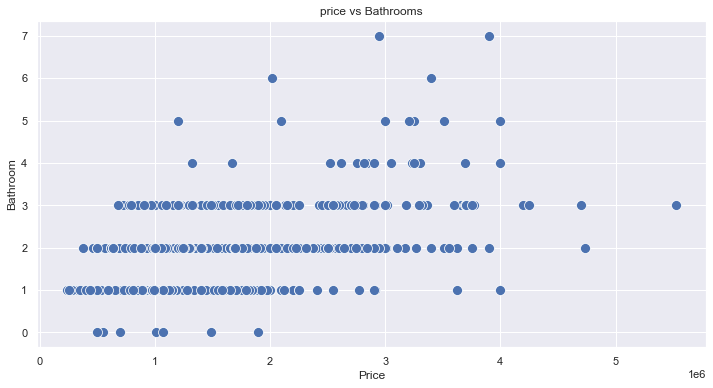

In [14]:
plt.figure(figsize=(12,6))
plt.title('price vs Bathrooms')

sns.scatterplot(melb_data.Price,
                melb_data.Bathroom,
                s=100);

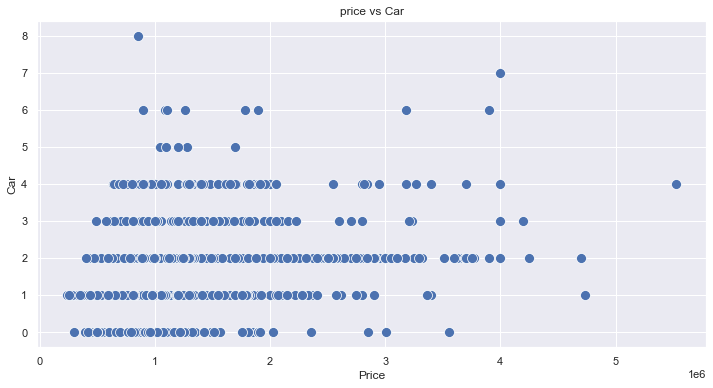

In [15]:
plt.figure(figsize=(12,6))
plt.title('price vs Car')

sns.scatterplot(melb_data.Price,
                melb_data.Car,
                s=100);

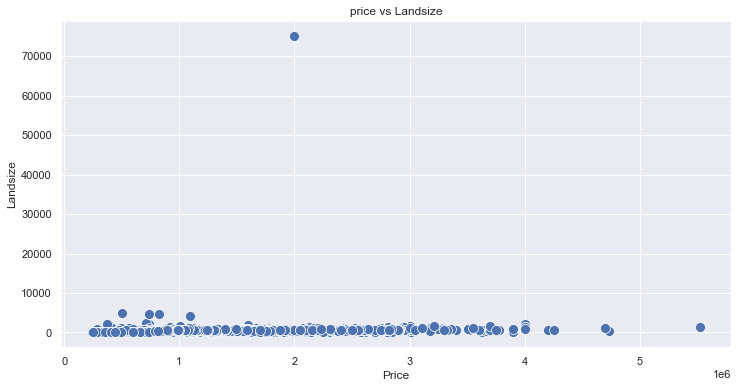

In [16]:
plt.figure(figsize=(12,6))
plt.title('price vs Landsize')

sns.scatterplot(melb_data.Price,
                melb_data.Landsize,
                s=100);

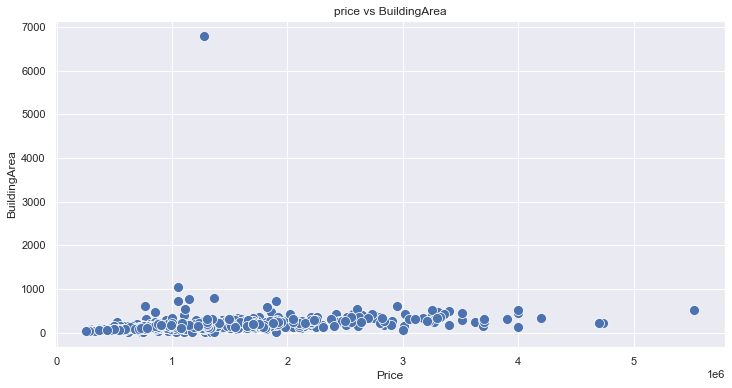

In [17]:
plt.figure(figsize=(12,6))
plt.title('price vs BuildingArea')

sns.scatterplot(melb_data.Price,
                melb_data.BuildingArea,
                s=100);

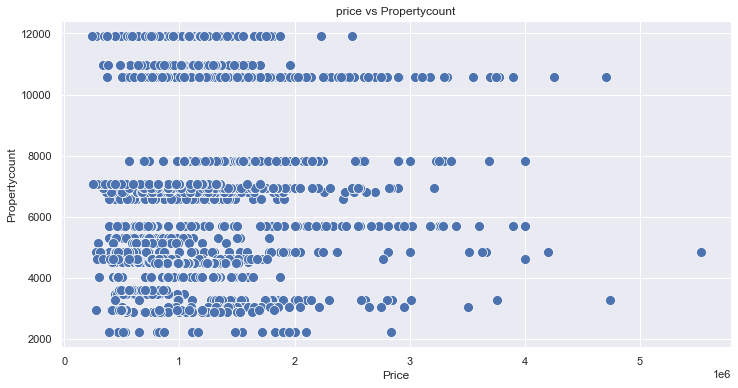

In [18]:
plt.figure(figsize=(12,6))
plt.title('price vs Propertycount')

sns.scatterplot(melb_data.Price,
                melb_data.Propertycount,
                s=100);

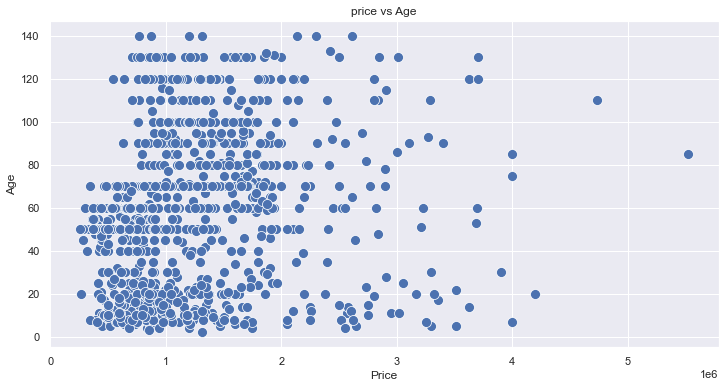

In [29]:
plt.figure(figsize=(12,6))
plt.title('price vs Age')

sns.scatterplot(melb_data.Price,
                melb_data.Age,
                s=100);

From the above all scatter plots there is no direct relation between each other and observed there is a moderate correlation b/w price and rooms, bathrooms, building area and weak correlation b/w age and price.

To know that exact correlation b/w each other we can use heatmap.

In [30]:
melb_data=pd.read_csv('melb_dataframe.csv')

First we need to create a correlation using df.corr() method then give that correlation to the sns.heatmap.

In [32]:
melb_corr=melb_data.corr(method='pearson')

In [33]:
melb_corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.586990,0.209535,0.089949,0.921564,0.611983,0.405332,0.082576,0.282361,-0.018420,-0.068620,0.167248,-0.011315
Price,0.586990,1.000000,-0.019004,0.329387,0.561000,0.561614,0.303258,0.098684,0.241351,-0.187851,-0.179717,0.305383,0.017509
Distance,0.209535,-0.019004,1.000000,0.358616,0.200167,0.133833,0.265972,0.033508,0.095038,0.367027,-0.559787,0.256316,0.086394
Postcode,0.089949,0.329387,0.358616,1.000000,0.086930,0.165563,0.056086,-0.001245,0.069616,0.014230,-0.827485,0.625433,0.178335
Bedroom2,0.921564,0.561000,0.200167,0.086930,1.000000,0.618866,0.397846,0.079866,0.278023,-0.005017,-0.072416,0.155363,-0.019962
Bathroom,0.611983,0.561614,0.133833,0.165563,0.618866,1.000000,0.335680,0.027042,0.210369,0.214109,-0.119704,0.181562,-0.015639
Car,0.405332,0.303258,0.265972,0.056086,0.397846,0.335680,1.000000,0.071526,0.159904,0.109419,-0.126954,0.080647,-0.015442
Landsize,0.082576,0.098684,0.033508,-0.001245,0.079866,0.027042,0.071526,1.000000,0.163783,-0.069734,0.010455,0.047360,-0.001163
BuildingArea,0.282361,0.241351,0.095038,0.069616,0.278023,0.210369,0.159904,0.163783,1.000000,0.090656,-0.015370,0.128784,-0.032306
YearBuilt,-0.018420,-0.187851,0.367027,0.014230,-0.005017,0.214109,0.109419,-0.069734,0.090656,1.000000,-0.112939,0.070139,-0.025929


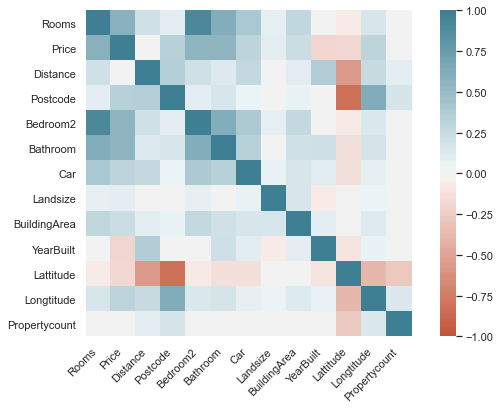

In [34]:
ax = sns.heatmap(
    melb_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

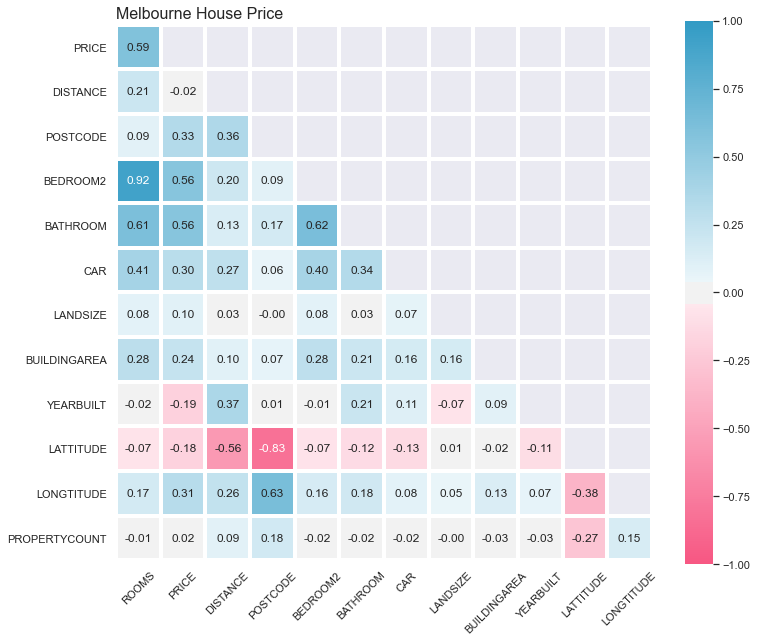

In [37]:
fig,ax=plt.subplots(figsize=(12,10))
mask=np.triu(np.ones_like(melb_corr,dtype=np.bool))
mask=mask[1:,:-1]
corr=melb_corr.iloc[1:,:-1].copy()
cmap=sns.diverging_palette(0,230,90,60,as_cmap=True)
sns.heatmap(corr,mask=mask,annot=True,fmt='.2f',linewidth=3,cmap=cmap,vmin=-1,vmax=1,square=True)
yticks=[i.upper() for i in corr.index]
xticks=[i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0],labels=yticks,rotation=0)
plt.xticks(plt.xticks()[0],labels=xticks,rotation=45)
title="Melbourne House Price"
plt.title(title,loc='left',fontsize=16)
plt.show()

by observing above heatmap we can infer such as
-  Weak Positive Correlation between Age and Price
-  Moderate Positive Correlation between Rooms and Price
-  Moderate Positive Correlation between Bathrooms and Price
-  Moderate Positive Correlation between Building Area and Price
-  The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.
	